In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Amazon Sale Report.csv')
print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [3]:
# Summary statistics
print(df.describe())

               index            Qty         Amount  ship-postal-code  New  \
count  128976.000000  128976.000000  121176.000000     128941.000000  0.0   
mean    64486.130427       0.904401     648.562176     463945.677744  NaN   
std     37232.897832       0.313368     281.185041     191458.488954  NaN   
min         0.000000       0.000000       0.000000     110001.000000  NaN   
25%     32242.750000       1.000000     449.000000     382421.000000  NaN   
50%     64486.500000       1.000000     605.000000     500033.000000  NaN   
75%     96730.250000       1.000000     788.000000     600024.000000  NaN   
max    128974.000000      15.000000    5584.000000     989898.000000  NaN   

       PendingS  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  


# What percentage of the orders were cancelled?

In [4]:
total_orders = len(df)
# Count the number of cancelled orders
cancelled_orders = df[df['Status'] == 'Cancelled'].shape[0]

# Calculate the percentage of cancelled orders
percentage_cancelled = (cancelled_orders / total_orders) * 100

percentage_cancelled

14.215047760823719

# Sales Trends Over Time

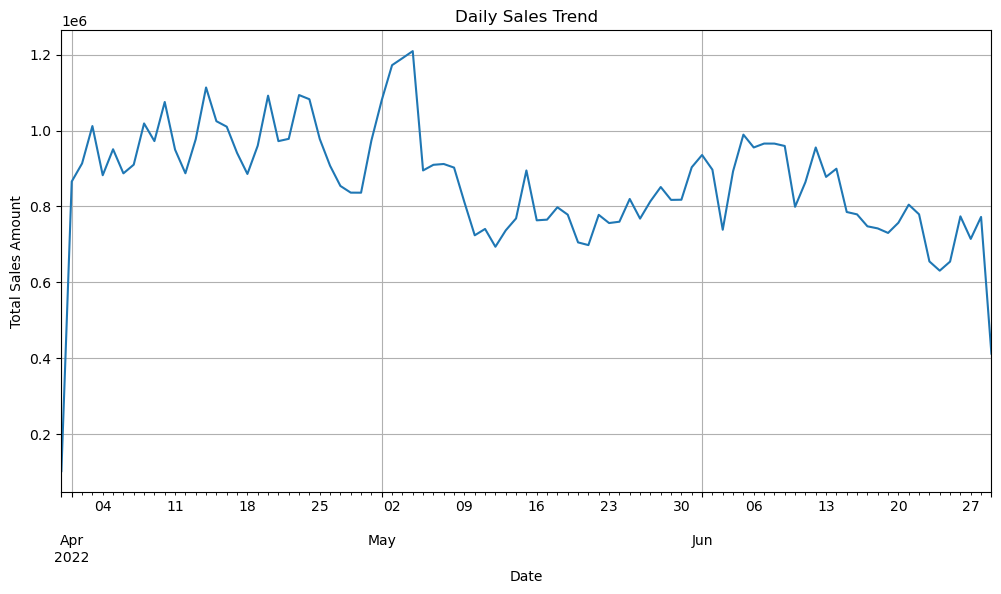

In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and sum the amounts
daily_sales = df.groupby('Date')['Amount'].sum()

# Plot
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


# Which city had the highest number of orders?

In [6]:
city_order_counts = df.groupby('ship-city')['Order ID'].count()
city_with_max_orders = city_order_counts.idxmax()
max_orders = city_order_counts.max()
print(f"City with the highest number of orders: {city_with_max_orders} ({max_orders} orders)")

City with the highest number of orders: BENGALURU (11208 orders)


# Visualize the distribution of order Amount using a histogram.

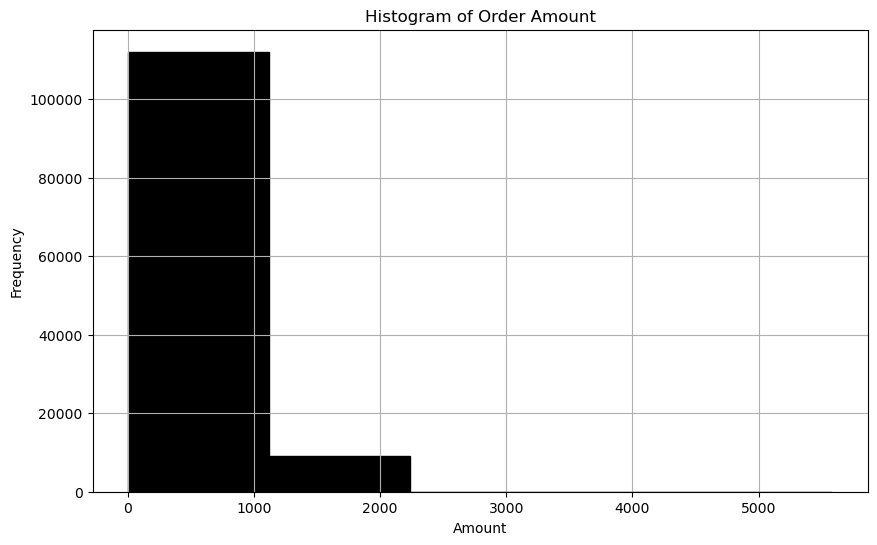

In [7]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=5, color='black', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Order Amount')
plt.grid(True)
plt.show()

# What is the total revenue generated from all orders?

In [8]:
# Filter out the cancelled orders
non_cancelled_orders = df[df['Status'] != 'Cancelled']

# Calculate the total revenue from non-cancelled orders
total_revenue = non_cancelled_orders['Amount'].sum()
total_revenue

71671747.0

# What is the average order Amount for orders that were "Shipped - Delivered to Buyer"?

In [9]:
# Filter the DataFrame for orders with status "Shipped - Delivered to Buyer"
delivered_orders = df[df['Status'] == 'Shipped - Delivered to Buyer']

# Calculate the average order amount for these orders
average_amount = delivered_orders['Amount'].mean()

print(f"The average order amount for orders that were 'Shipped - Delivered to Buyer' is: {average_amount}")

The average order amount for orders that were 'Shipped - Delivered to Buyer' is: 648.475824405176


# The state that generated the highest total revenue.

In [10]:
# Group by 'ship_state' and sum the 'Amount' for each state
state_revenue = df.groupby('ship-state')['Amount'].sum()

# Determine the state with the highest total revenue
highest_revenue_state = state_revenue.idxmax()
highest_revenue = state_revenue.max()

print(f"The state that generated the highest total revenue is {highest_revenue_state} with a total revenue of {highest_revenue}")

The state that generated the highest total revenue is MAHARASHTRA with a total revenue of 13340333.05


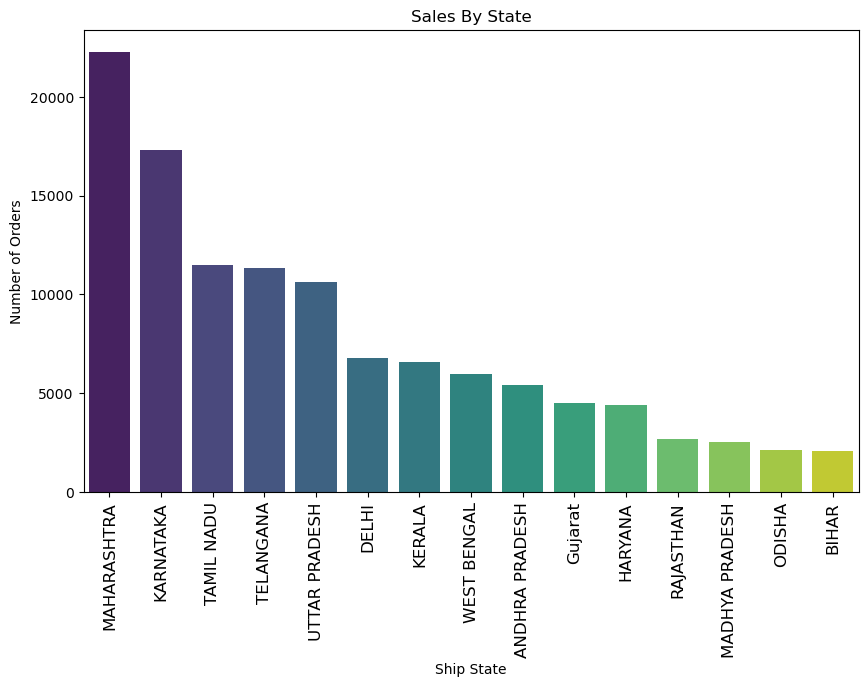

In [11]:
order_counts = df['ship-state'].value_counts().head(15)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')
plt.xlabel('Ship State')
plt.ylabel('Number of Orders')
plt.title('Sales By State')
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

# The  category which yields higher sales?

In [12]:
# Group by product category and count the number of orders
category_order_counts = df.groupby('Category')['Order ID'].count()

# Find the product category with the highest number of orders
category_with_max_orders = category_order_counts.idxmax()
max_orders = category_order_counts.max()
# category_with_max_orders
print(f"Product category with the highest number of orders: {category_with_max_orders} ({max_orders} orders)")

Product category with the highest number of orders: T-shirt (50292 orders)


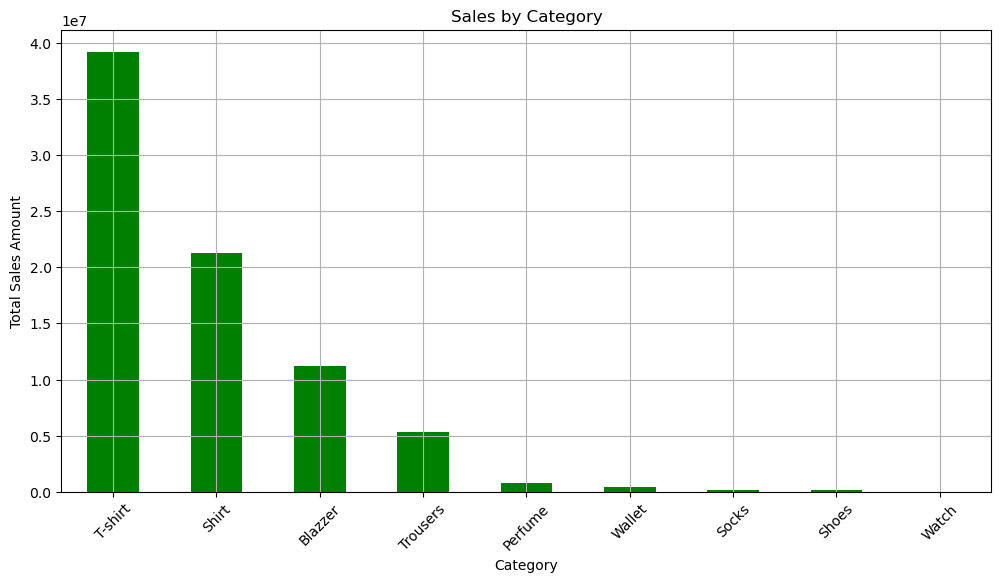

In [13]:
# Group by category and sum the amounts
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='green')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Generate a scatter plot comparing Qty and Amount.

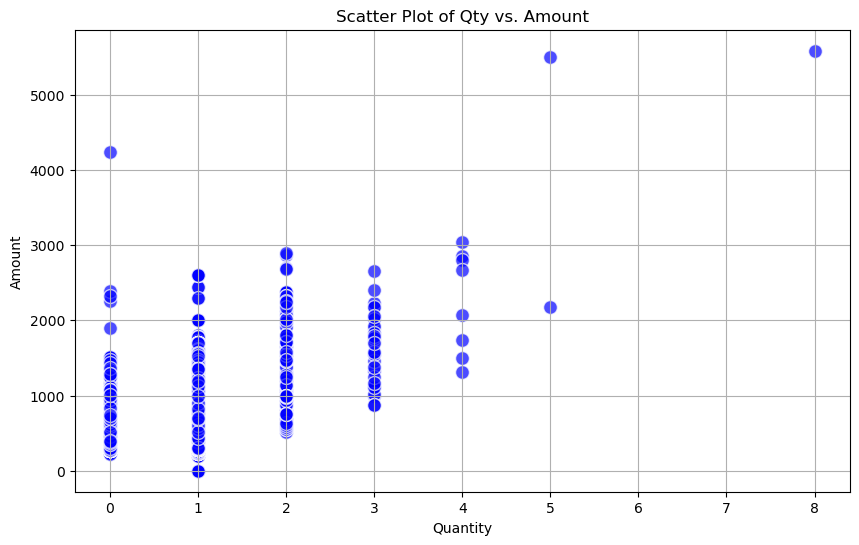

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Qty'], df['Amount'], color='blue', alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.title('Scatter Plot of Qty vs. Amount')
plt.grid(True)
plt.show()

# Business-to-Business Product Ordering

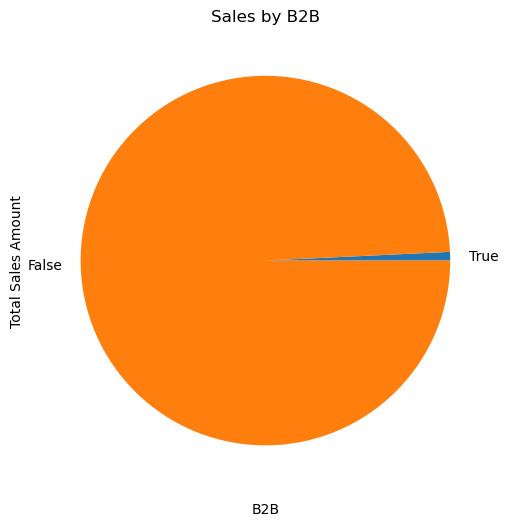

In [15]:
# Group by B2B flag and sum the amounts
b2b_sales = df.groupby('B2B')['Amount'].sum().sort_values(ascending=True)

# Plot
plt.figure(figsize=(12, 6))
b2b_sales.plot(kind='pie')
plt.title('Sales by B2B')
plt.xlabel('B2B')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

# Most common size ordered by the customers

In [16]:
# Find the most common Size for each Category
most_common_size = df.groupby('Category')['Size'].agg(lambda x: x.mode()[0])

print(most_common_size)

Category
Blazzer        L
Perfume     Free
Shirt          L
Shoes       Free
Socks          S
T-shirt        M
Trousers      XL
Wallet      Free
Watch       Free
Name: Size, dtype: object


# Orders that are delivered by the Easy Ship method

In [17]:
# Filter rows where 'fulfilled-by' is 'Easy Ship'
easy_ship_orders = df[df['fulfilled-by'] == 'Easy Ship']

# Count the number of such orders
easy_ship_order_count = easy_ship_orders.shape[0]

print(f"Number of orders shipped by the 'Easy Ship' method: {easy_ship_order_count}")

Number of orders shipped by the 'Easy Ship' method: 39263


# Sales by shiping service level

In [18]:
# Filter the DataFrame for orders with the "Expedited" service level
expedited_orders = df[df['ship-service-level'] == 'Expedited']

# Calculate the average order amount for these orders
average_amount_expedited = expedited_orders['Amount'].mean()

print(f"The average order amount for orders shipped with the 'Expedited' service level is: {average_amount_expedited}")

The average order amount for orders shipped with the 'Expedited' service level is: 656.2212660002659


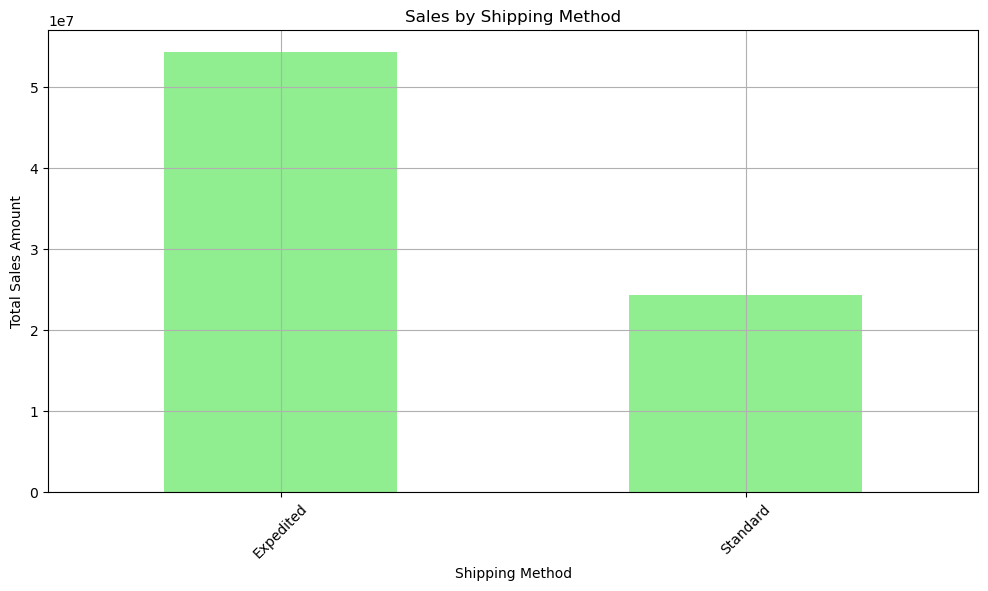

In [19]:
# Group by ship service level and sum the amounts
shipping_method_sales = df.groupby('ship-service-level')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
shipping_method_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Shiping Country  ( Sales by Country )


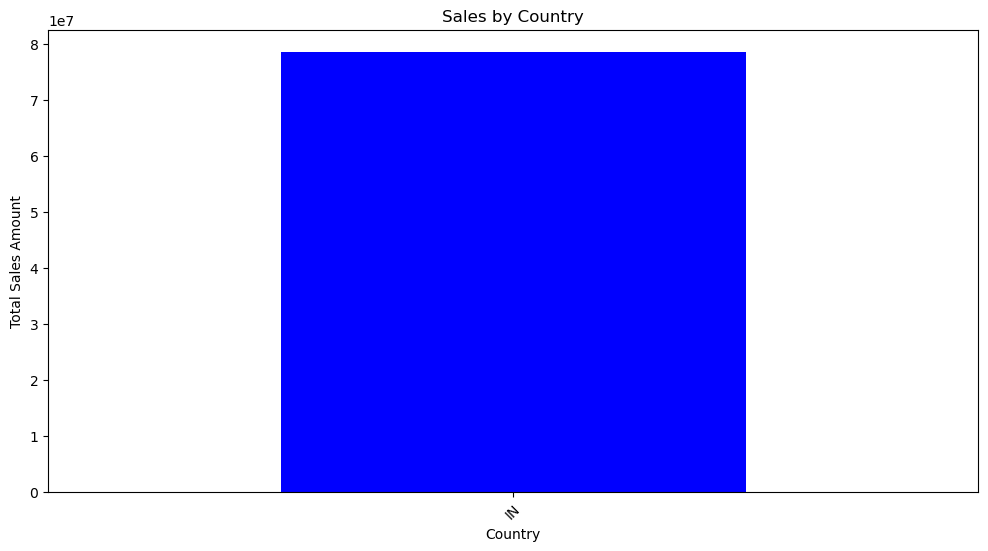

In [20]:
# Group by country and sum the amounts
country_sales = df.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar',color='blue')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


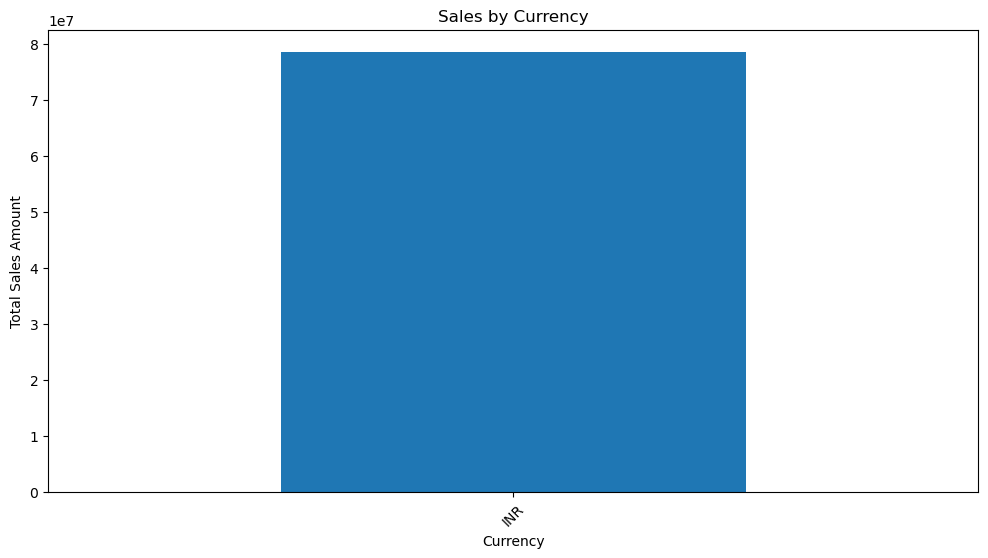

In [21]:
# Group by currency and sum the amounts
currency_sales = df.groupby('currency')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
currency_sales.plot(kind='bar')
plt.title('Sales by Currency')
plt.xlabel('Currency')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

# Sales by Channel: Amazon vs. Non-Amazon

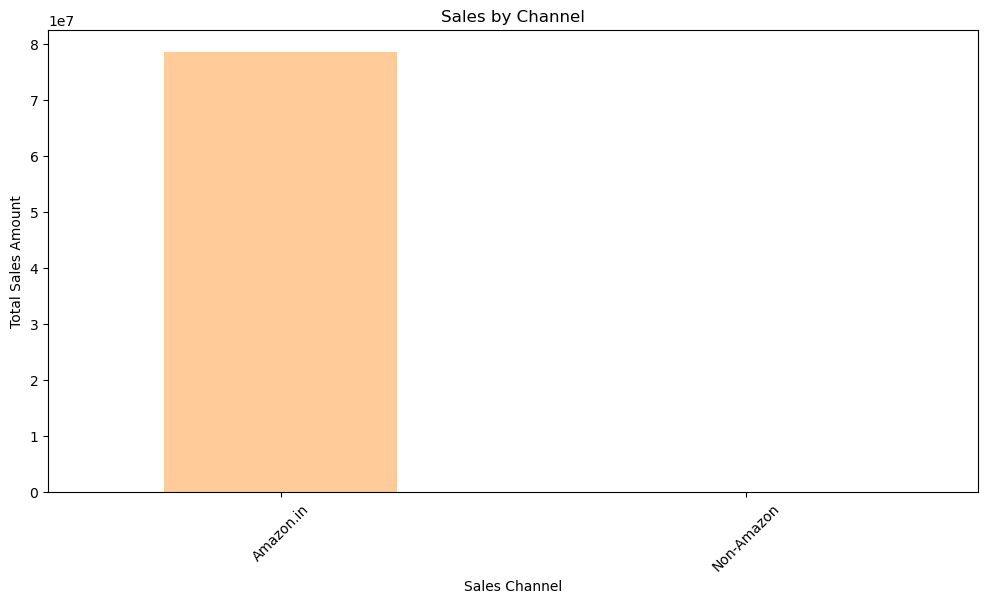

In [22]:
# Group by sales channel and sum the amounts
channel_sales = df.groupby('Sales Channel')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
channel_sales.plot(kind='bar',color='#ffcc99')
plt.title('Sales by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


# Distribution fulfilment: Amazon vs Merchant

In [23]:
df.groupby(['Fulfilment']).size().reset_index(name='Count')

,Fulfilment,Count
0,Amazon,89713
1,Merchant,39263


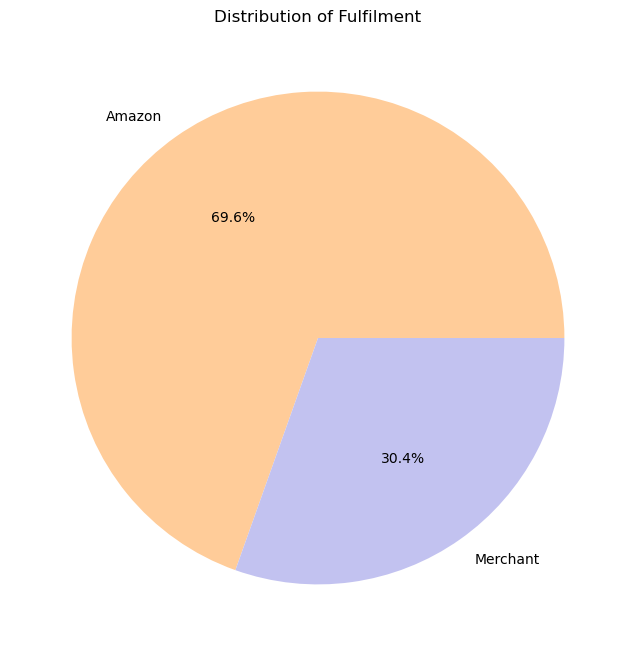

In [24]:
fulfilment_counts = df['Fulfilment'].value_counts()


custom_colors = ['#ffcc99','#c2c2f0','#ffb3e6']  # Add or adjust colors as needed

plt.figure(figsize=(8, 8))
plt.pie(fulfilment_counts, labels=fulfilment_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Distribution of Fulfilment')
plt.show()


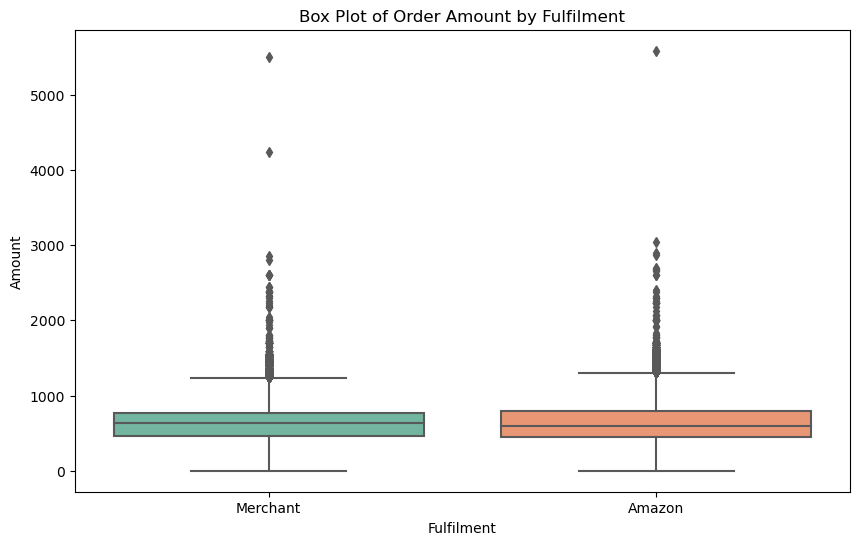

In [25]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fulfilment', y='Amount', data=df, palette='Set2')
plt.xlabel('Fulfilment')
plt.ylabel('Amount')
plt.title('Box Plot of Order Amount by Fulfilment')
plt.show()